## Diabetes Prediction
<!-- Author : Ashutosh Sahu(ashusahu198@gmail.com) -->

Dataset Source - [kaggle](https://www.kaggle.com/tigganeha4/diabetes-dataset-2019)

other references -
- https://www.sciencedirect.com/science/article/pii/S1877050920308024?via%3Dihub



## Data Dictionary
|S.no.| Parameters | Details |
|:-|:-|:-|
|1| Age | Age of the Patient (18 or above)|
|2| Gender | Male or Female |
|3| Family_Diabetes | Family history with diabetes (yes or no) |
|4| highBP | Diagnosed with high blood pressure (yes or no) |
|5| PhysicallyActive | walk/run or can be physically active |
|6| BMI | Body Mass Index |
|7| Smoking | Whether the person smokes or not (yes or no) |
|8| Alcohol | Alcohol consumer(yes or no)|
|9| Sleep | Hours of sleep |
|10| SoundSleep | Hours of sound sleep |
|11| RegularMedicine | Regular intake of medicine (yes or no) |
|12| JunkFood | Junk food consumer(yes or no)|
|13| Stress | how much stress taken |
|14| BPLevel | Hign/normal/low |
|15| Pregnancies | no. of Pregnancies |
|16| Pdiabetes | Gestation diabetes(yes or no) |
|17| UrinationFreq | Frequency of Urination (not much or quite much)|
| Diabetic | yes or no |

In [90]:
import pandas
df = pandas.read_csv('./datasets/diabetes_dataset.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [91]:
diabetes_data.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

### Handling Missing values

In [93]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [94]:
# for removing rows.
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(indexes)
df.drop(index= indexes,inplace = True)

[113, 116, 121, 122, 134]


In [95]:
# for imputing pregnancies
print(df['Pregancies'].value_counts())
df['Pregancies'].fillna(value = 0.0, inplace= True)
print(df['Pregancies'].value_counts())


0.0    750
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: Pregancies, dtype: int64


no     681
yes    265
 no      1
Name: Diabetic, dtype: int64
no     682
yes    265
Name: Diabetic, dtype: int64


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

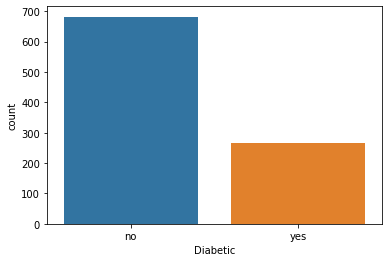

In [100]:

import seaborn
print(df['Diabetic'].value_counts())
df['Diabetic'].replace(' no', 'no', inplace=True)
print(df['Diabetic'].value_counts())
seaborn.countplot(x = 'Diabetic',data = df)

In [129]:
print(df['RegularMedicine'].value_counts())
df['RegularMedicine'].replace('o', 'no', inplace =True)
print(df['RegularMedicine'].value_counts())

no     612
yes    335
Name: RegularMedicine, dtype: int64
no     612
yes    335
Name: RegularMedicine, dtype: int64


In [135]:
print(df['Pdiabetes'].value_counts())
df['Pdiabetes'].replace('0', 'no', inplace = True)
print(df['Pdiabetes'].value_counts())


0      932
yes     14
no       1
Name: Pdiabetes, dtype: int64
no     933
yes     14
Name: Pdiabetes, dtype: int64


### Numerical Variable Analysis

/home/ashyk/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ashyk/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ashyk/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ashyk/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


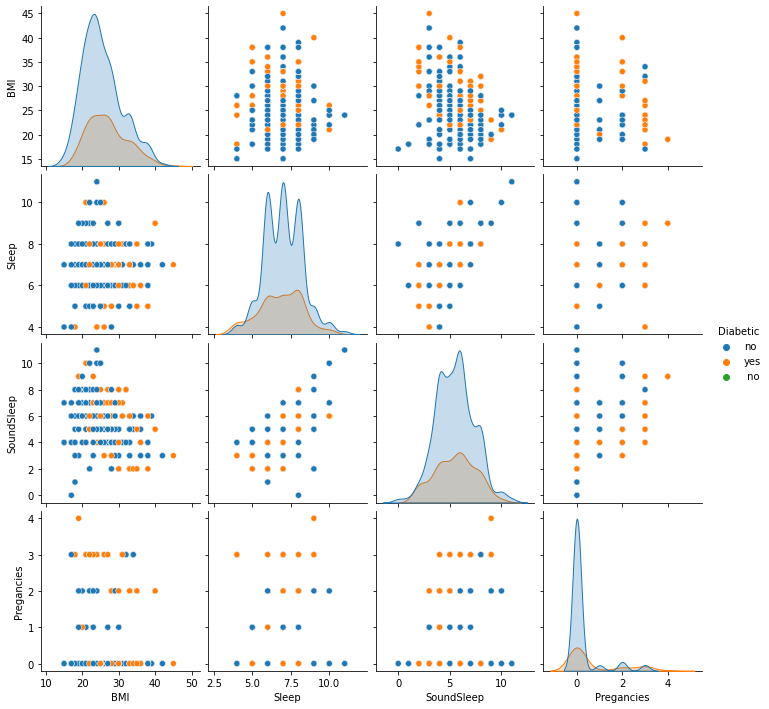

In [97]:
import seaborn
seaborn.pairplot(data=df, hue='Diabetic')

<AxesSubplot:xlabel='Diabetic', ylabel='SoundSleep'>

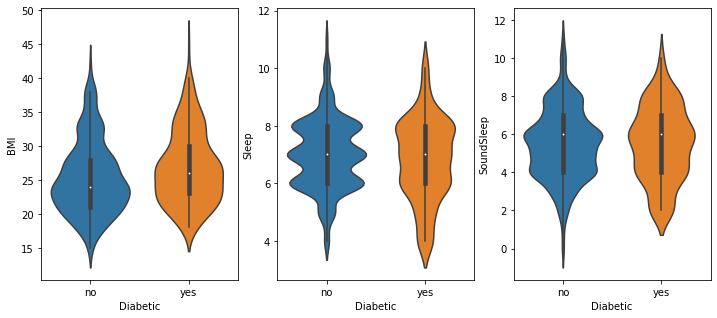

In [103]:
import matplotlib.pyplot as pyplot
import seaborn
fig = pyplot.figure(figsize= (12,5))
pyplot.subplot(131)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'BMI')
pyplot.subplot(132)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'Sleep')
pyplot.subplot(133)
seaborn.violinplot(data = df, x = 'Diabetic', y = 'SoundSleep')

### Categorical Variable Analysis

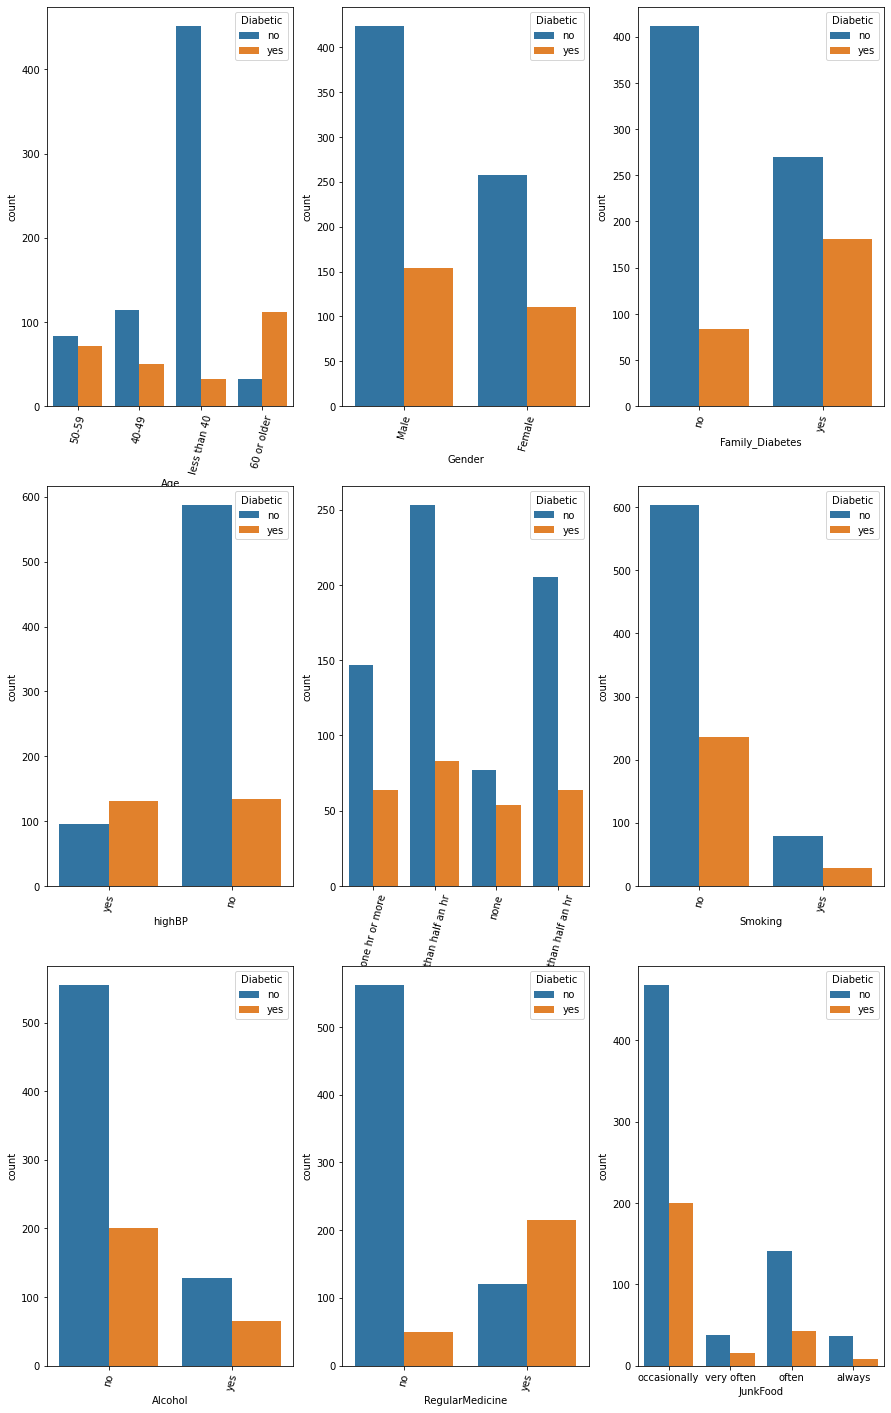

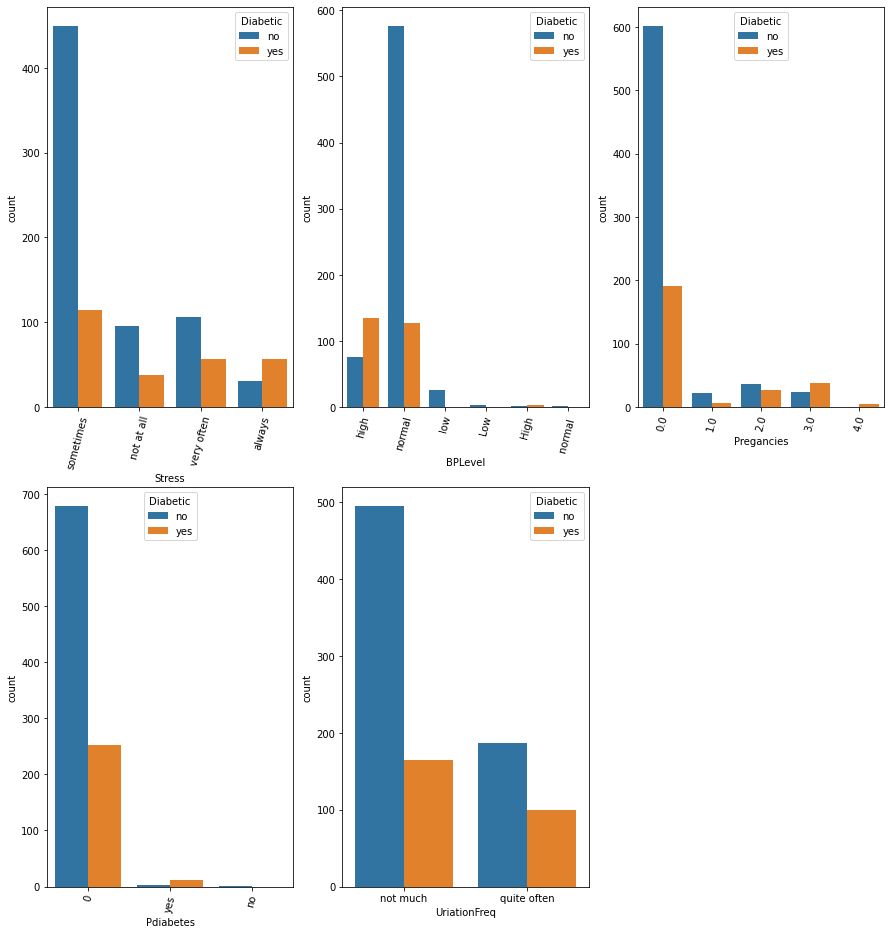

In [132]:

cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq']

pyplot.figure(figsize = (15,25))

i  = 0
for j in range(9):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
pyplot.show()

pyplot.figure(figsize = (15,25))
for j in range(5):
    pyplot.xticks(rotation=75)
    pyplot.subplot(int(str(3)+str(3)+str(j+1)))
    seaborn.countplot(x = cols[i], hue='Diabetic',data = df)
    i += 1
